In [87]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
houses = pd.read_table('AmesHousing_1.txt',sep='\t')
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
houses['Land Slope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [6]:
houses['Roof Style'].unique()

array(['Hip', 'Gable', 'Mansard', 'Gambrel', 'Shed', 'Flat'], dtype=object)

In [7]:
houses['Kitchen AbvGr'].unique()

array([1, 2, 3, 0])

most frequent value in the distribution the mode.

### Ordinal Var Mode

In [8]:
houses['Land Slope'].value_counts()

Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64

In [55]:
def mode_field(arr):
    field_count = {}
    for row in arr:
        if row not in field_count.keys():
            field_count[row] = 1
        else:
            field_count[row] += 1
    return max(field_count,key=field_count.get)
        

In [56]:
mode_field(houses['Land Slope'])

'Gtl'

In [57]:
houses['Land Slope'].mode()

0    Gtl
dtype: object

### Nominal Var Mode

In [59]:
def mode(array):
    counts = {}
    
    for value in array:
        if value in counts:
            counts[value] += 1
        else:
            counts[value] = 1
    
    return counts,max(counts, key = counts.get)

In [60]:
value_counts,mode = mode(houses['Roof Style'])

In [61]:
value_counts

{'Hip': 551,
 'Gable': 2321,
 'Mansard': 11,
 'Gambrel': 22,
 'Shed': 5,
 'Flat': 20}

In [62]:
mode

'Gable'

In [63]:
houses['Roof Style'].value_counts()

Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: Roof Style, dtype: int64

### Discrete Numerical Var Mode

In [64]:
houses['Bedroom AbvGr'].unique()

array([3, 2, 1, 4, 6, 5, 0, 8])

In [66]:
len(houses['SalePrice'].unique())

1032

### Special cases

distribution bimodal (the prefix "bi-" means "twice"). If the distribution had only one mode, we'd call it unimodal (the prefix "uni-" means "only one"

 When a distribution has more than two modes, we say that the distribution is multimodal (the prefix "multi-" means many).

Distributions without a mode are often specific to continuous variables. It's quite rare to find two identical values in a continuous distribution (especially if we have decimal numbers), so the frequency of each unique value is usually 1. Even if we find identical values, their frequency is very likely to be too low to produce a meaningful mode value.

In [68]:
intervals = pd.interval_range(start = 0, end = 800000, freq = 100000)
gr_freq_table = pd.Series([0,0,0,0,0,0,0,0], index = intervals)

for value in houses['SalePrice']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break

print(gr_freq_table)

(0, 100000]          252
(100000, 200000]    1821
(200000, 300000]     627
(300000, 400000]     166
(400000, 500000]      47
(500000, 600000]      11
(600000, 700000]       4
(700000, 800000]       2
dtype: int64


In [83]:
mode = houses[(houses['SalePrice'] > 10000 )& (houses['SalePrice'] < 200000)]['SalePrice'].mode()[0]
mode

135000

In [84]:
houses[(houses['SalePrice'] > 10000 )& (houses['SalePrice'] < 200000)]['SalePrice'].value_counts()

135000    34
140000    33
130000    29
155000    28
145000    26
          ..
63900      1
68000      1
186800     1
144152     1
169985     1
Name: SalePrice, Length: 576, dtype: int64

In [81]:
mean = houses['SalePrice'].mean()
mean

180796.0600682594

In [82]:
median = houses['SalePrice'].median()
median

160000.0

### Skewed Distributions 

plot a histogram or a kernel density plot to visualize the shape of a distribution, the mode will always be the peak of the distribution. In the code below, we plot a kernel density plot to visualize the shape of the SalePrice variable

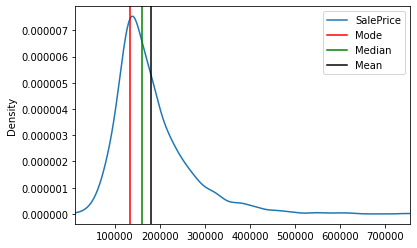

In [101]:
houses['SalePrice'].plot.kde(xlim=(houses['SalePrice'].min(),houses['SalePrice'].max()))
plt.axvline(houses['SalePrice'].mode()[0],c='red',label='Mode')
plt.axvline(houses['SalePrice'].median(),c='green',label='Median')
plt.axvline(houses['SalePrice'].mean(),c='black',label='Mean')
plt.legend()

In [85]:
distribution_1 = {'mean': 3021 , 'median': 3001, 'mode': 2947}
distribution_2 = {'median': 924 , 'mode': 832, 'mean': 962}
distribution_3 = {'mode': 202, 'mean': 143, 'median': 199}

right-skewed distribution:

* Most values are concentrated in the left body of the distribution where they will form a peak — this is where the mode will be.

* Remember that the median divides a distribution in two halves of equal length. For this reason, the median is usually positioned slightly right from the peak (the mode) for a right-skewed distribution.

* The mean takes into account each value in the distribution, and it will be affected by the outliers in the right tail. This will generally pull the mean to the right of the median.

> Mode -> Median -> Mean

left-skewed distribution:

* the direction is simply reversed: 
* the mean is positioned to the left of the median, and the median to the left of the mode.

> Mean <- Median <- Mode

In [103]:
sorted(distribution_1,key=distribution_1.get) # right

['mode', 'median', 'mean']

In [104]:
sorted(distribution_2,key=distribution_2.get) # rgiht

['mode', 'median', 'mean']

In [106]:
sorted(distribution_3,key=distribution_3.get)  # left 

['mean', 'median', 'mode']

Although the mean and the median have a constant location for every symmetrical distribution (no matter the shape), the location of the mode can change.


The mode is where the peak is, so for a normal distribution the mode will be at the center,

<img src="img/s2m3_normal.svg">

symmetrical distribution with more than one peak, which means that the mode won't be at the center

<img src="img/s2m3_two_modes.svg">

uniform distribution doesn't have any peaks, which means it doesn't have any mode:

<img src="img/s2m3_uniform.svg">

### Symmetrical Distributions

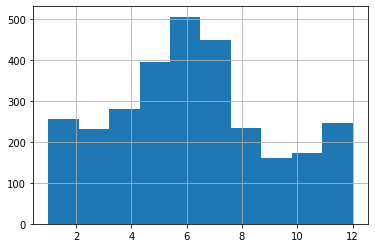

In [107]:
houses['Mo Sold'].hist()

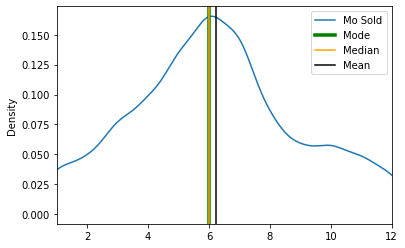

In [117]:
houses['Mo Sold'].plot.kde(
    xlim=(houses['Mo Sold'].min(),houses['Mo Sold'].max())
)

plt.axvline(houses['Mo Sold'].mode()[0],c='green',label='Mode',lw=3.5)
plt.axvline(houses['Mo Sold'].median(),c='orange',label='Median')
plt.axvline(houses['Mo Sold'].mean(),c='black',label='Mean')
plt.legend()

In [115]:
houses['Mo Sold'].mode()[0]

6